In [1]:
import requests
from bs4 import BeautifulSoup

ano = input("Digite o ano que você deseja saber quais foram os gastos dos vereadores (AAAA): ")
mes = input("Digite o mês que você deseja saber quais foram os gastos dos vereadores (MM): ")

requisicao = requests.get(f"https://sisgvarmazenamento.blob.core.windows.net/prd/PublicacaoPortal/Arquivos/{ano}{mes}.htm")

# Dados brutos da página inteira
sopa = BeautifulSoup(requisicao.content, "html.parser")

# Find pega a primeira ocorrência do que está na tag desejada
sopa.find("h1").text

Digite o ano que você deseja saber quais foram os gastos dos vereadores (AAAA): 2017
Digite o mês que você deseja saber quais foram os gastos dos vereadores (MM): 01


'\r\n                        CÂMARA MUNICIPAL DE SÃO PAULO'

In [2]:
bloco = sopa.find("table", {"class": "bloco"})
bloco.find("p").text.strip()

'Vereador(a): ABOU ANNI'

In [3]:
blocos = sopa.find_all("table", {"class": "bloco"})

tds = blocos[0].find_all("td")
tds[-3].text

'7.358,82'

In [4]:
planilha = [] # {"vereador": nome, "gasto": int}
for linha in blocos:
    vereador = linha.find("p").text.strip()
    # Removendo as lideranças da planilha
    if vereador.startswith("Liderança"):
        break
    # Tirando tudo que vem antes dos dois pontos
    vereador = vereador.split(": ")[1]
    # Deixando as todas as letras iniciais maiúsculas
    vereador = vereador.title()
    # Selecionando todas as células td
    celulas = linha.find_all("td")
    # Selecionando a antepenúltima célula que tem o valor
    valor = celulas[-3].text
    # Transformando string do valor em float
    valor = valor.replace(".", "")
    valor = valor.replace(",", ".")
    # Criando um dicionário com os dados
    dicionario = {"vereador": vereador, "gasto": float(valor)}
    # Colocando na lista planilha para virar um csv
    planilha.append(dicionario)

In [5]:
planilha

[{'gasto': 7358.82, 'vereador': 'Abou Anni'},
 {'gasto': 10095.12, 'vereador': 'Adilson Amadeu'},
 {'gasto': 5012.89, 'vereador': 'Adriana Ramalho'},
 {'gasto': 13129.43, 'vereador': 'Alessandro Guedes'},
 {'gasto': 14534.3, 'vereador': 'Alfredinho'},
 {'gasto': 7005.02, 'vereador': 'Aline Cardoso'},
 {'gasto': 4283.92, 'vereador': 'André Santos'},
 {'gasto': 19036.89, 'vereador': 'Arselino Tatto'},
 {'gasto': 5935.12, 'vereador': 'Atilio Francisco'},
 {'gasto': 10733.95, 'vereador': 'Aurelio Nomura'},
 {'gasto': 2955.5, 'vereador': 'Caio Miranda'},
 {'gasto': 0.0, 'vereador': 'Camilo Cristófaro'},
 {'gasto': 0.0, 'vereador': 'Celso Jatene'},
 {'gasto': 7017.51, 'vereador': 'Claudinho De Souza'},
 {'gasto': 237.85, 'vereador': 'Claudio Fonseca'},
 {'gasto': 10639.51, 'vereador': 'Conte Lopes'},
 {'gasto': 20400.52, 'vereador': 'Dalton Silvano'},
 {'gasto': 0.0, 'vereador': 'Daniel Annenberg'},
 {'gasto': 8040.53, 'vereador': 'David Soares'},
 {'gasto': 12959.02, 'vereador': 'Donato'},


In [7]:
import pandas

df = pandas.DataFrame(planilha)

df["gasto"].mean() # Média de gastos

9022.079499999998

In [8]:
df["gasto"].sum() # Soma de gastos

541324.7699999999

In [9]:
df["gasto"].median() # Mediana de gastos

8734.985

In [10]:
df.sort_values(by = "gasto", ascending = False)

,gasto,vereador
47,23061.11,Ricardo Teixeira
21,22167.74,Eduardo Matarazzo Suplicy
56,21187.43,Souza Santos
57,20953.23,Toninho Paiva
16,20400.52,Dalton Silvano
40,19448.73,Ota
7,19036.89,Arselino Tatto
54,18070.86,Senival Moura
52,17186.73,Sâmia Bomfim
39,17157.13,Noemi Nonato


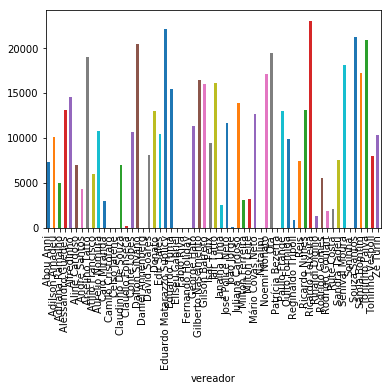

In [11]:
agrupamento = df.groupby("vereador")["gasto"].mean()

%matplotlib inline
import matplotlib.pyplot as plt

agrupamento.plot.bar()

In [12]:
# Definição de endereço de envio e senha para enviar e-mail

gmail_sender = ""
gmail_passwd = ""

In [16]:
# Script para mandar e-mail

msg = "Aqui vai a lista de gastos:\n\n"
for linha in planilha:
    msg += f"{linha[vereador]}: R$ {linha[gasto]}\n"
    
import smtlib

server = smtlib.SMTP_SSL("smtp.gmail.com", 465)
server.login(gmail_sender, gmail_passwd)

para = "caiquealencarjor@gmail.com"
corpo = msg.encode("utf8")

server.sendmail(gmail_sender, para, corpo)
server.quit()

KeyError: 'Liderança  PHS'